In [1]:
import gmdh

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn. model_selection import train_test_split
import datetime
import warnings

warnings.simplefilter('ignore')

In [2]:
def print_metrics(y_test, y_pred, squared=False):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    crit_name = "MSE" if squared else "RMSE"
    print(f"{crit_name}: {mean_squared_error(y_test, y_pred, squared=squared)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

# Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

Для проведения анализа я выбрал датасет о сердечных заболеваниях: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Мы будем решать задачу по предсказыванию смерти человека по сердечным заболеваниям, что является актуальным в наше время.

В датасете один файл, поэтому впоследствии мы сделаем на основе датасета тестовую и обучающую выборку.

- age - возраст
- anaemia - анемия
- creatinine_phosphokinase - уровень фермента CPK в крови
- diabetes - диабет
- ejection_fraction - процент крови, покидающей сердце при каждом сокращении
- high_blood_pressure - высокое кровяное давление
- platelets - тромбоциты
- serum_creatinine - уровень сывороточного креатинина в крови
- serum_sodium - уровень сывороточного натрия в крови
- sex - пол
- smoking - курение 
- time - время
- DEATH_EVENT - событие смерти 

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=0.2, random_state=2)

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасета.

In [4]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [5]:
# Первые 5 строк датасета
train.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
53   70.0        1                        69         1                 50   
172  70.0        1                       171         0                 60   
23   53.0        0                        63         1                 60   
98   60.0        1                       156         1                 25   
244  54.0        0                       582         1                 38   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
53                     1   351000.0               1.0           134    0   
172                    1   176000.0               1.1           145    1   
23                     0   368000.0               0.8           135    1   
98                     1   318000.0               1.2           137    0   
244                    0   264000.0               1.8           134    1   

     smoking  time  DEATH_EVENT  
53         0    44            1  
172        1   146            0  
23         0    22            0  
98         0    85            0  
244        0   213            0

In [6]:
# Первые 5 строк датасета
test.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
179  55.0        0                       835         0                 40   
221  65.0        0                       118         0                 50   
226  58.0        1                        57         0                 25   
7    60.0        1                       315         1                 60   
173  50.0        1                       115         0                 20   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
179                    0   279000.0               0.7           140    1   
221                    0   194000.0               1.1           145    1   
226                    0   189000.0               1.3           132    1   
7                      0   454000.0               1.1           131    1   
173                    0   189000.0               0.8           139    1   

     smoking  time  DEATH_EVENT  
179        1   147            0  
221        1   200            0  
226        1   205            0  
7          1    10            1  
173        0   146            0

In [7]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [8]:
# Удалим дубликаты записей, если они присутствуют
train = train.drop_duplicates()
test = test.drop_duplicates()
data = data.drop_duplicates()

In [9]:
train.shape

(239, 13)

In [10]:
test.shape

(60, 13)

In [11]:
# Список колонок
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
# Список колонок с типами данных 
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
train.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [13]:
test.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [14]:
# Проверим наличие пустых значений
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [15]:
test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Вывод. Представленный набор данных не содержит пропусков ни в обучающей, ни в тестовой выборках.

Построение графиков для понимания структуры данных.

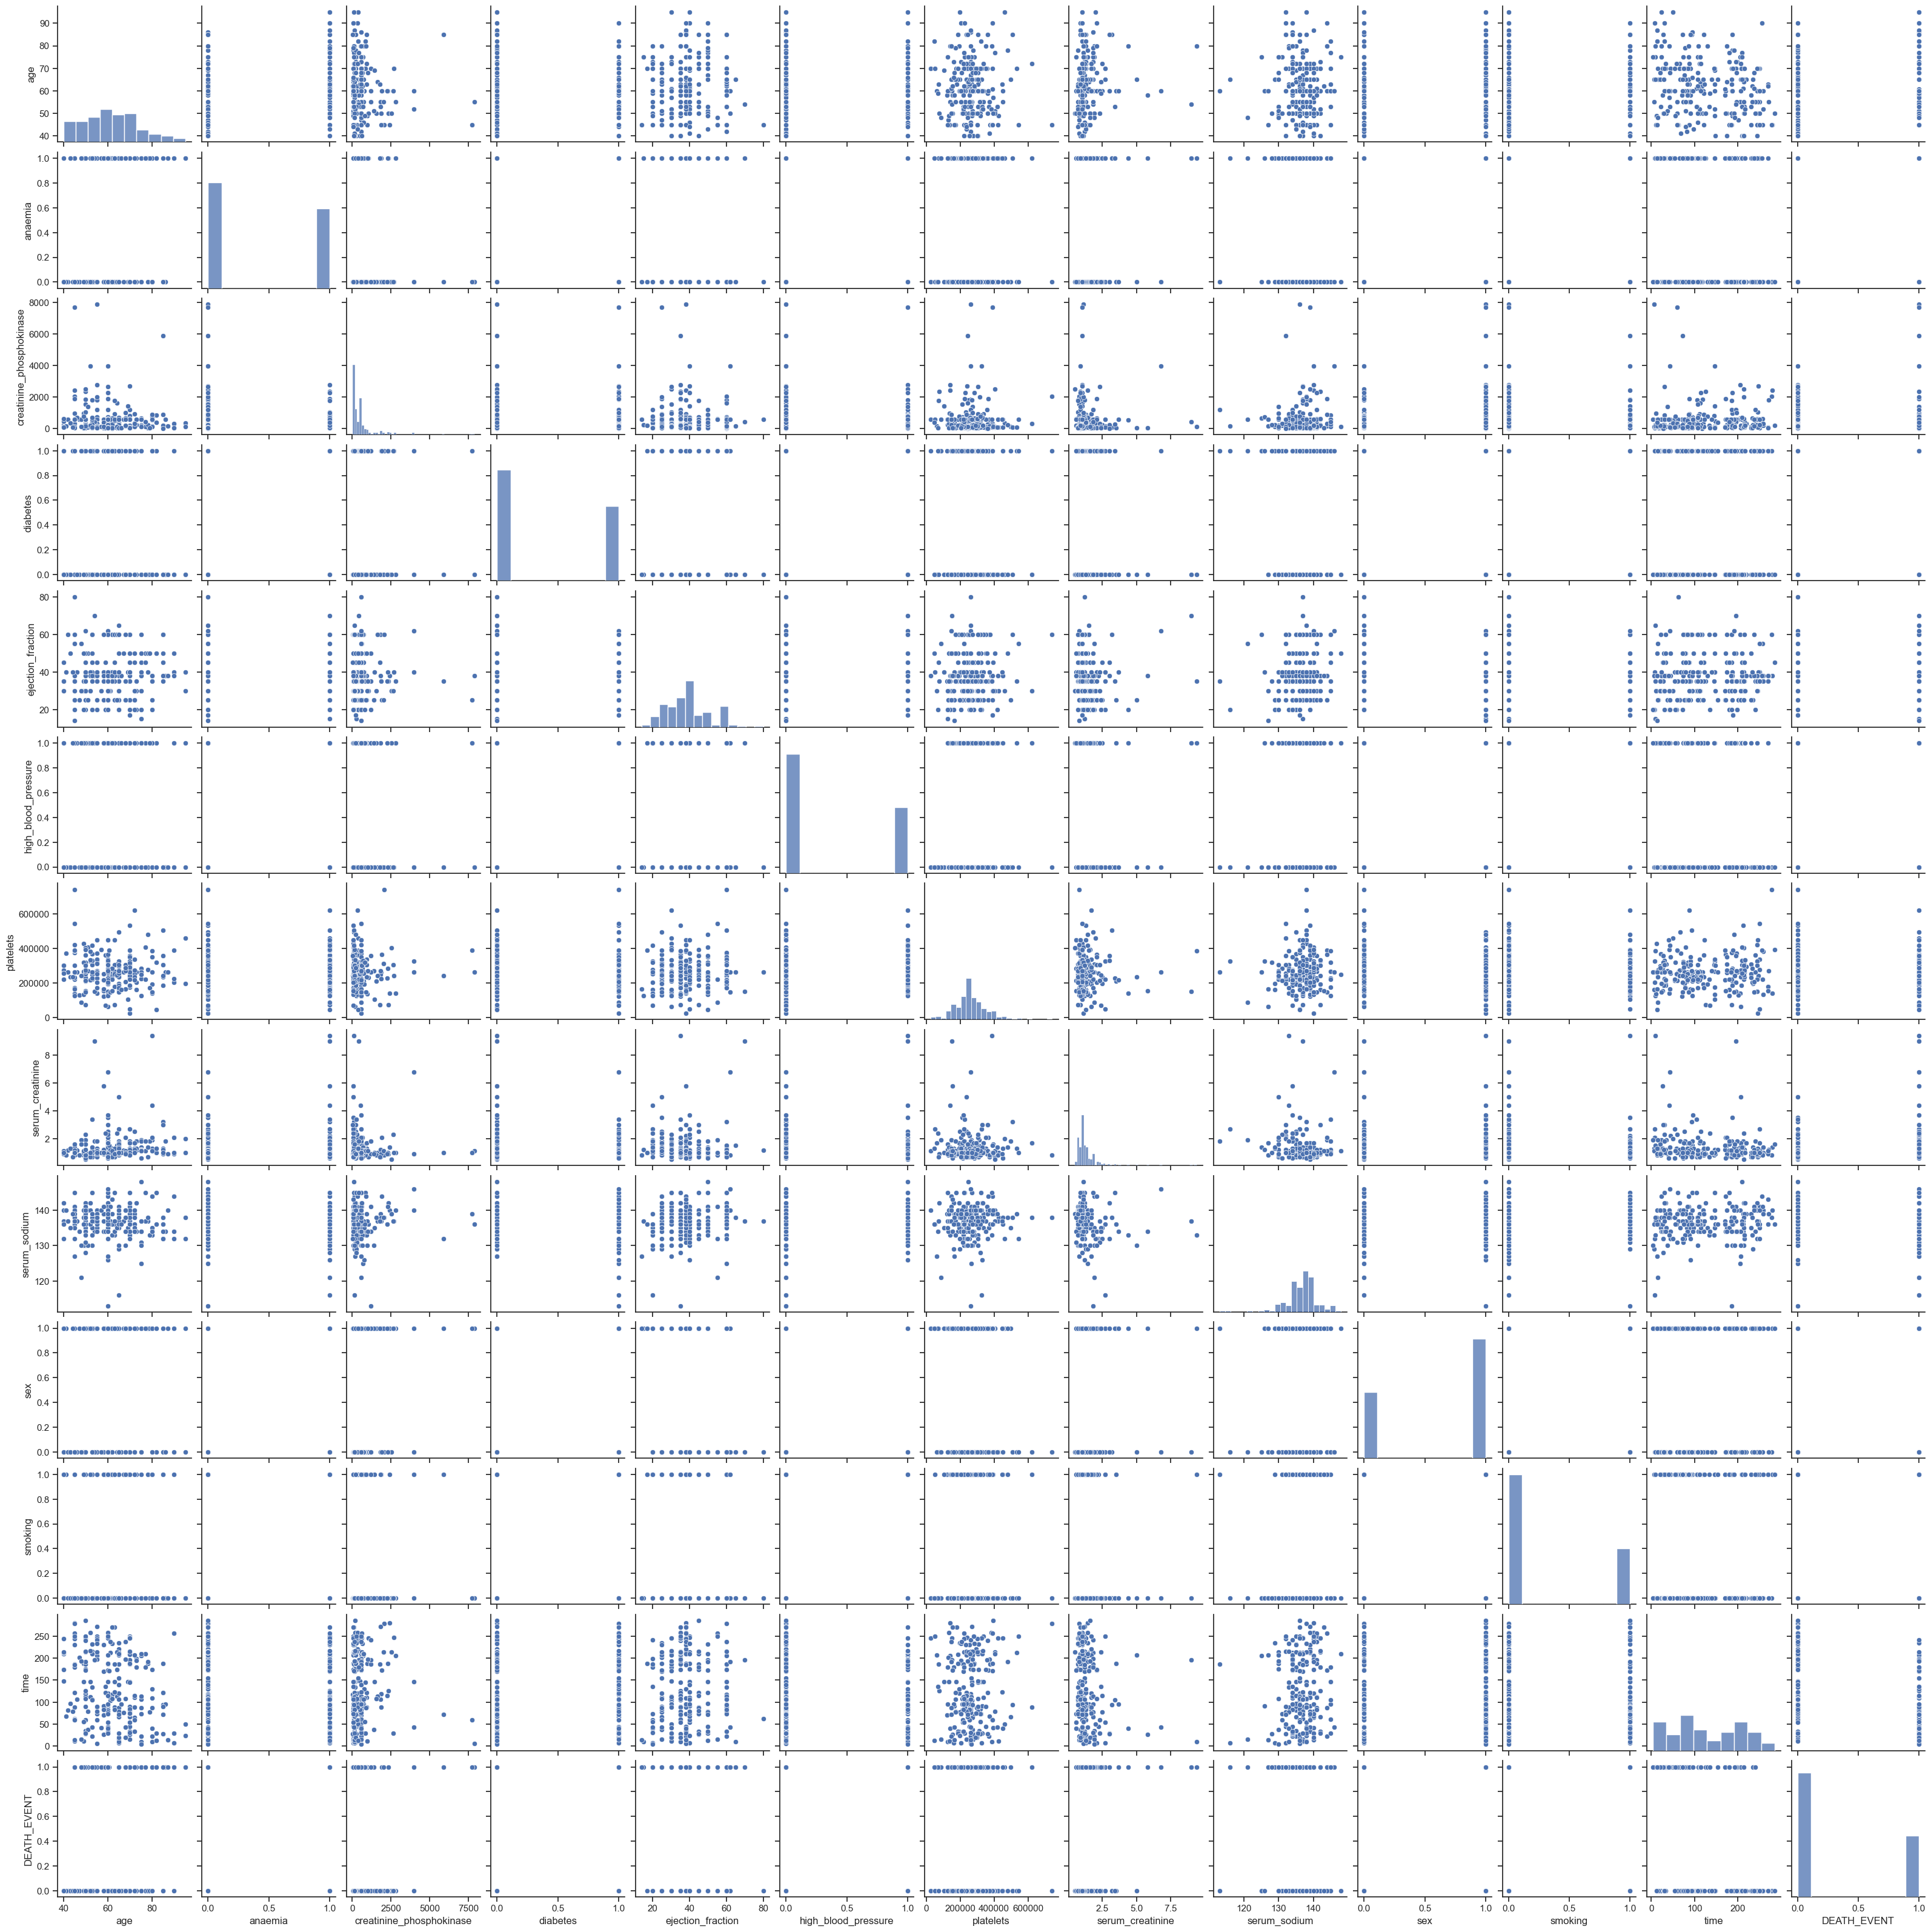

In [16]:
# Парные диаграммы
sns.pairplot(train)

In [17]:
# Убедимся, что целевой признак содержит только 0 и 1
train['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

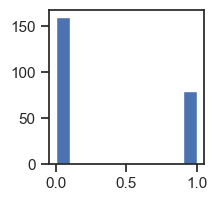

In [18]:
# Оценим дисбаланс классов для DEATH_EVENT
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['DEATH_EVENT'])
plt.show()

In [19]:
train['DEATH_EVENT'].value_counts()

0    160
1     79
Name: DEATH_EVENT, dtype: int64

In [20]:
# Посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['DEATH_EVENT'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 66.95%, а класс 1 составляет 33.050000000000004%.


### Вывод. Дисбаланс классов присутствует, но является приемлемым.

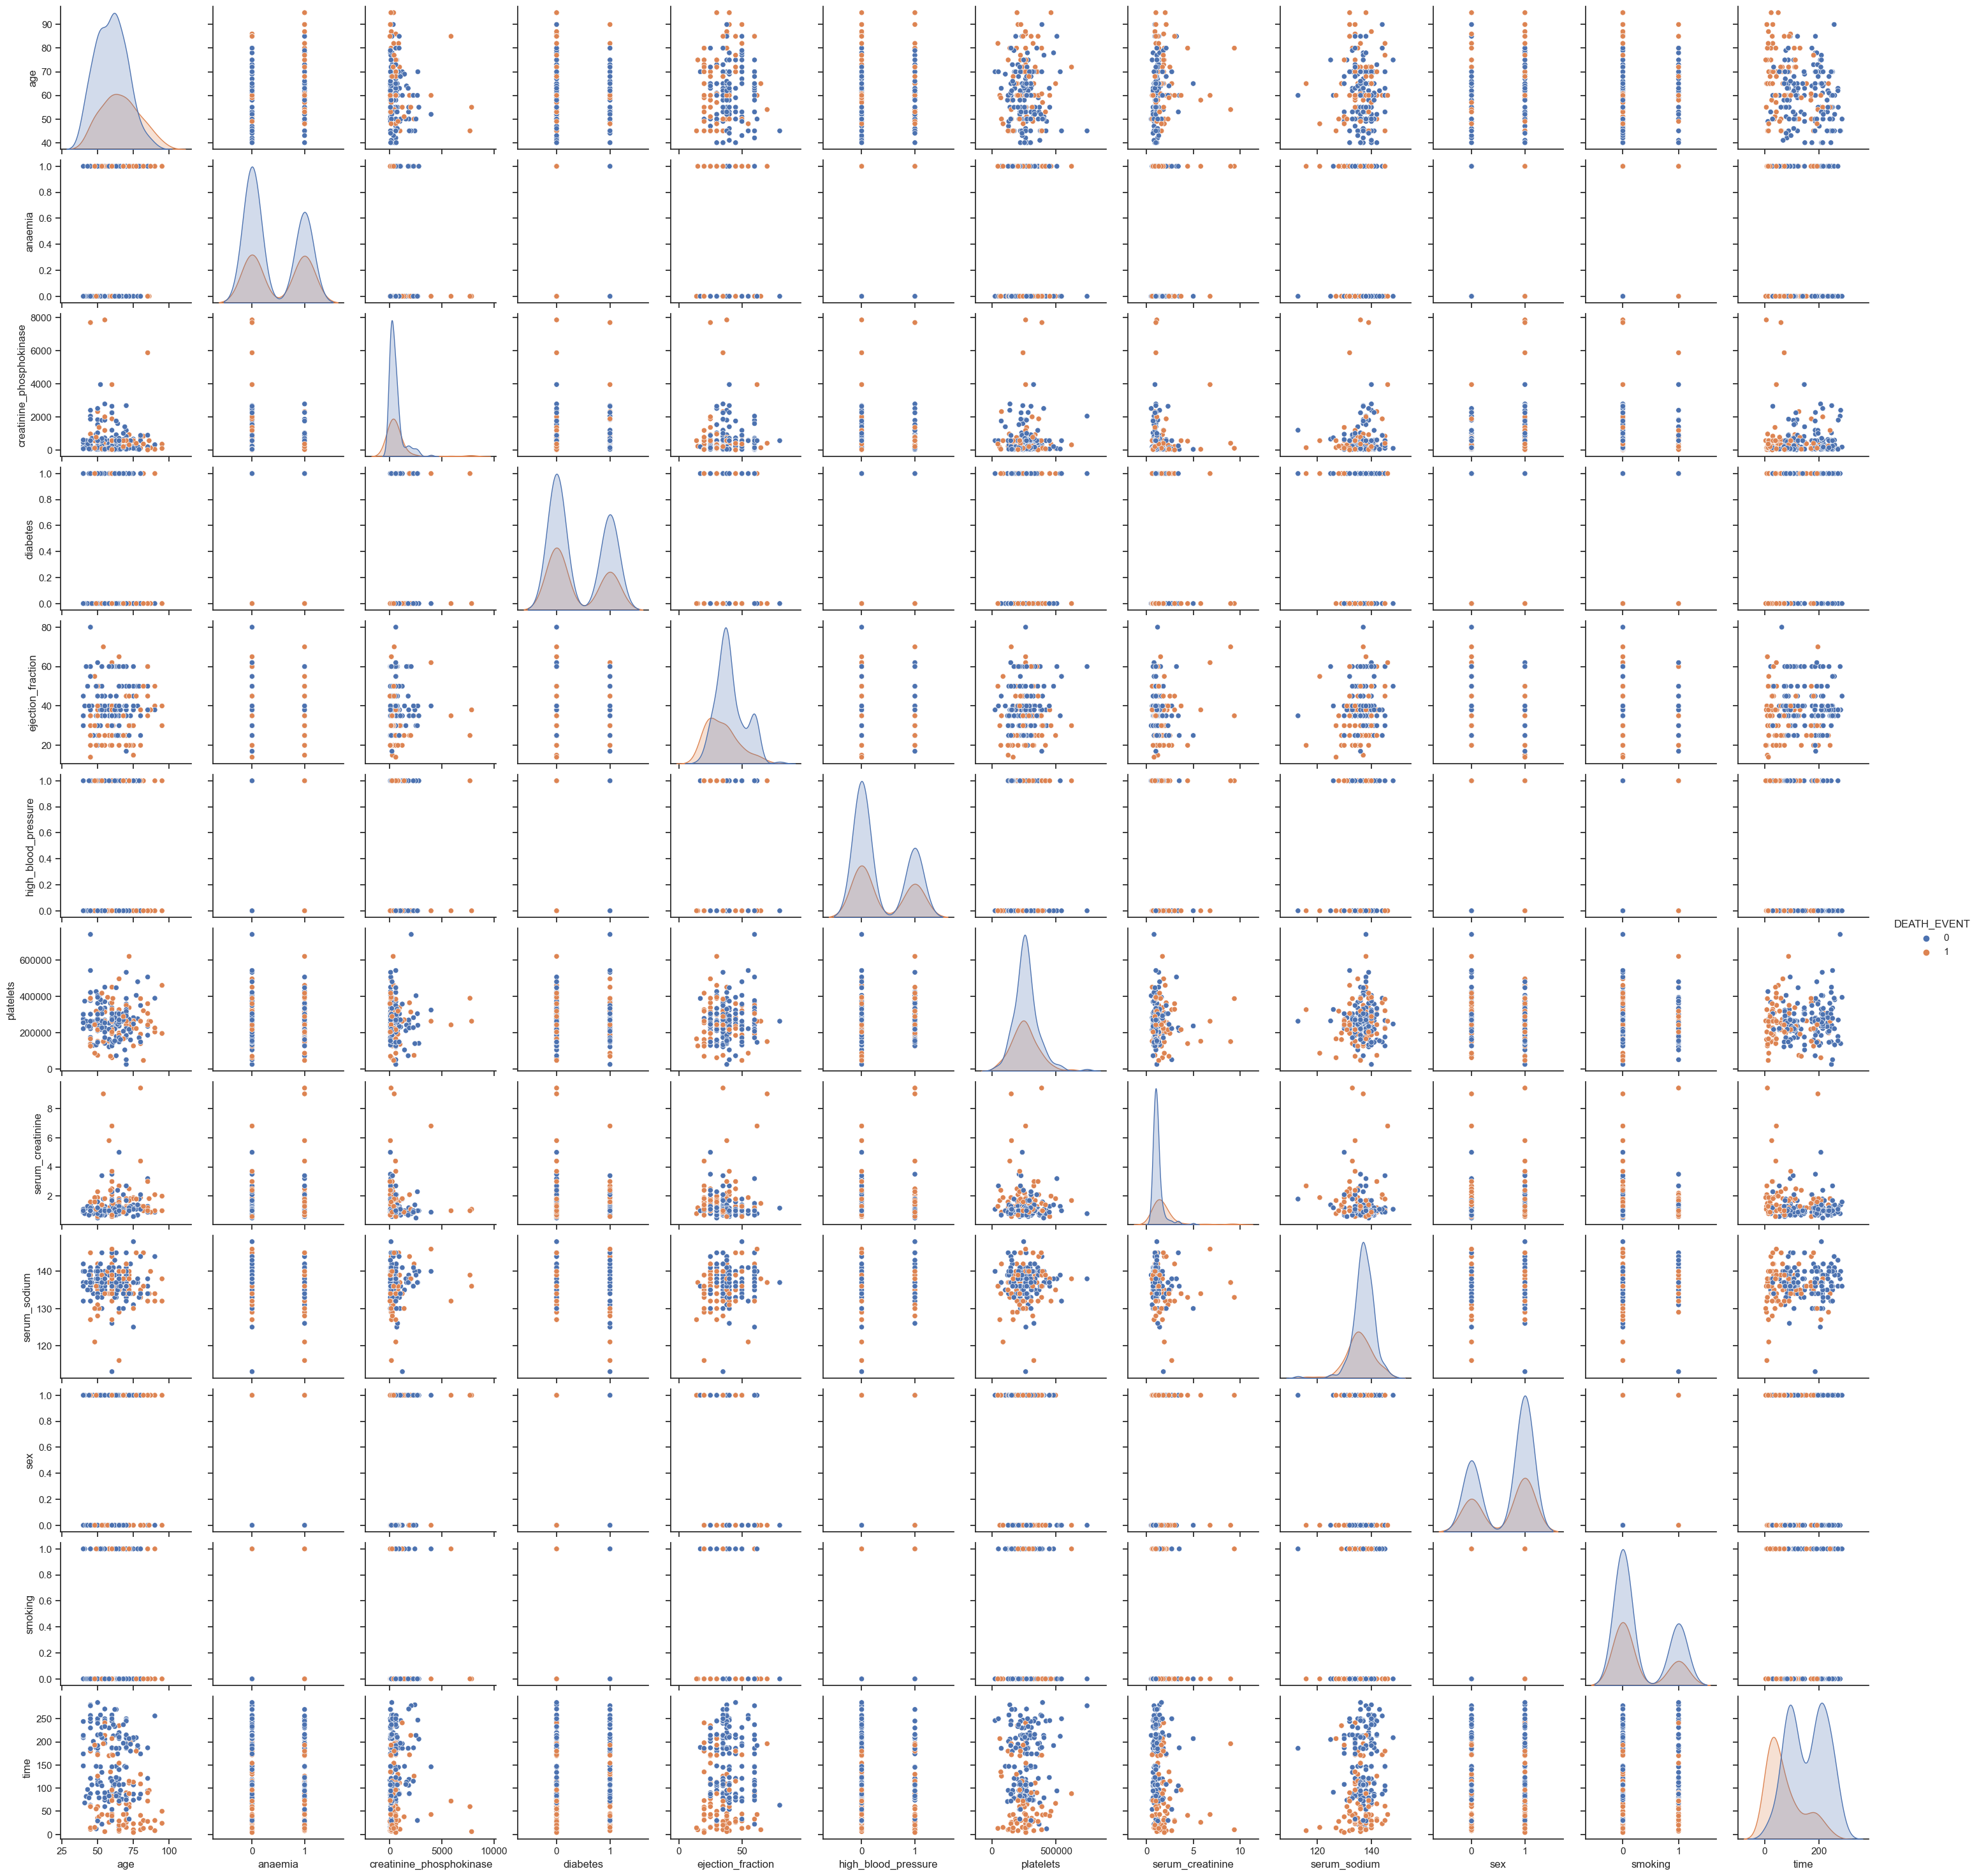

In [21]:
sns.pairplot(train, hue="DEATH_EVENT")

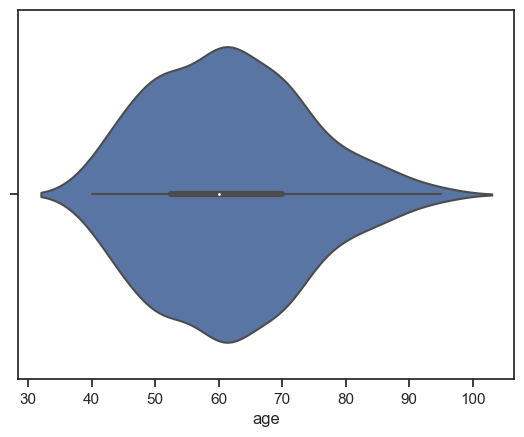

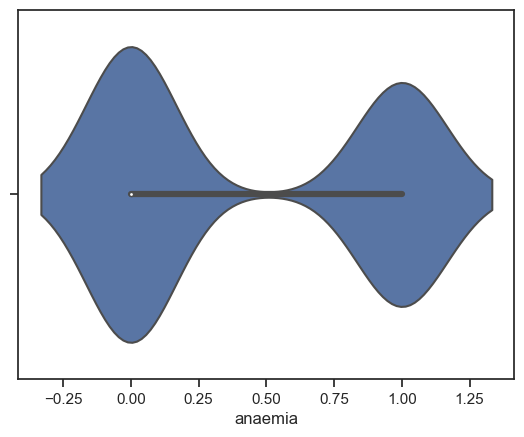

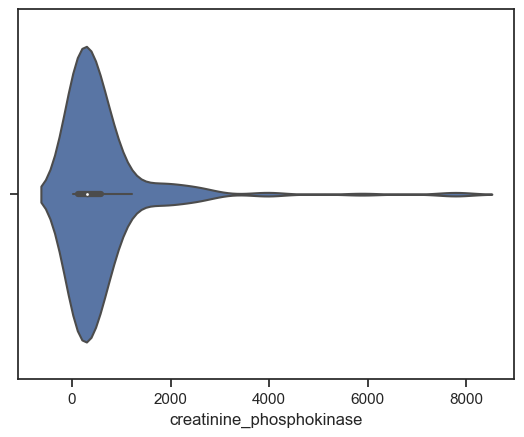

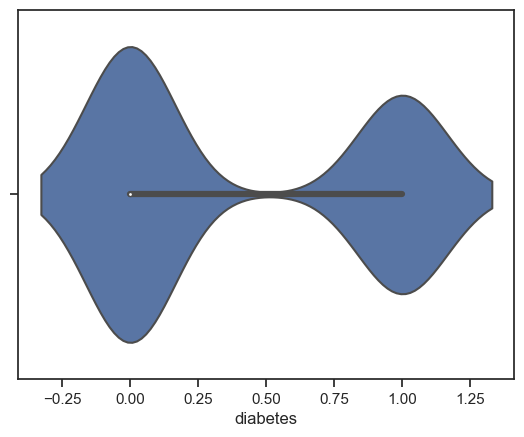

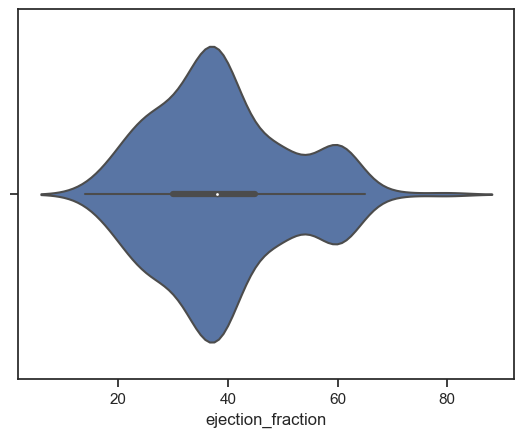

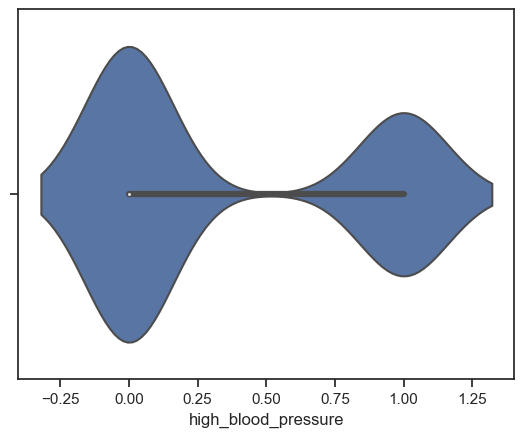

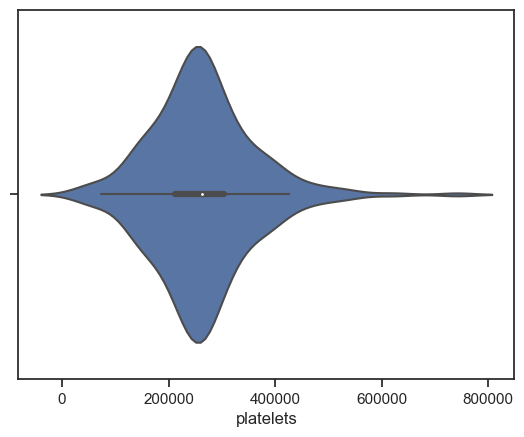

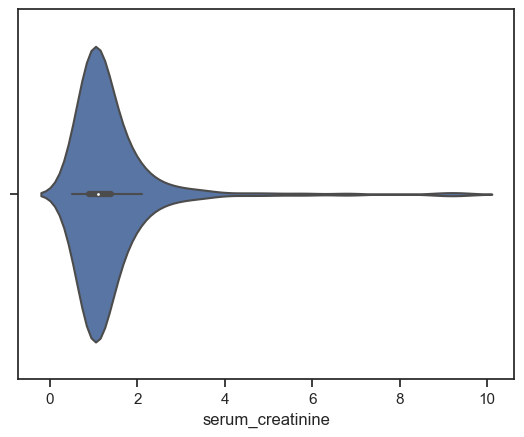

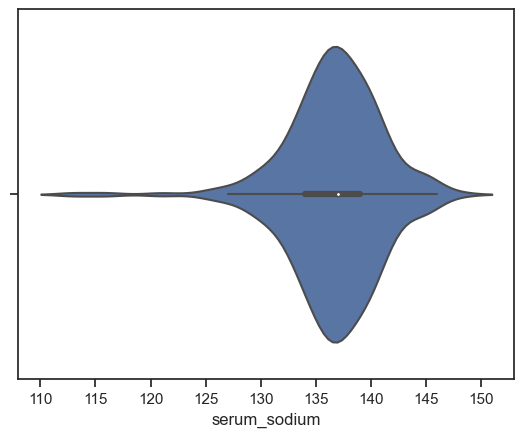

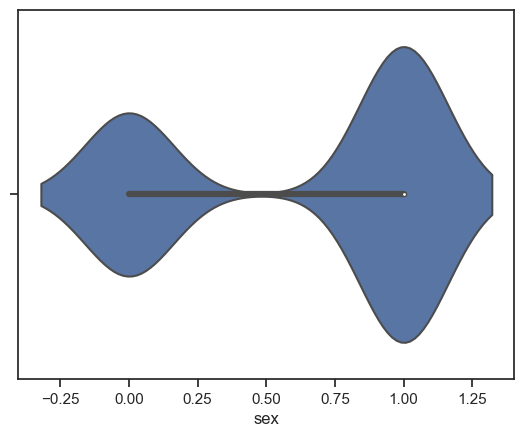

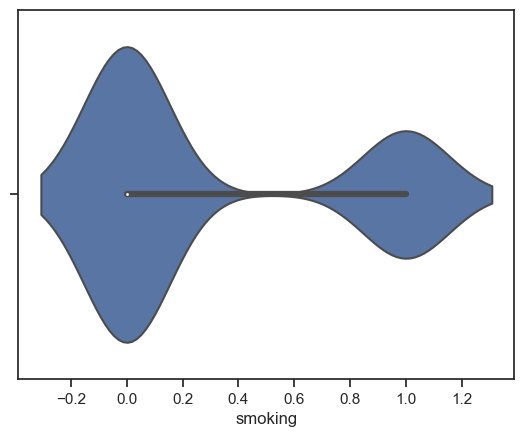

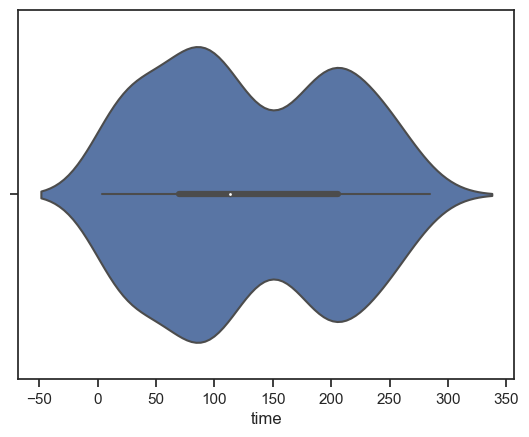

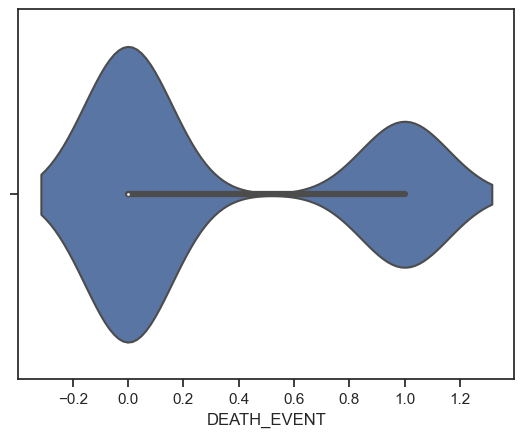

In [22]:
# Скрипичные диаграммы для числовых колонок
for col in ['age', 'anaemia', 'creatinine_phosphokinase',
       'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']:
    sns.violinplot(x=train[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей


Выполним масштабирование данных.

In [23]:
scale_cols = ['age', 'anaemia', 'creatinine_phosphokinase',
       'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

In [24]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [25]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [26]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  ...  \
0                    1  265000.00               1.9           130    1  ...   
1                    0  263358.03               1.1           136    1  ...   
2                    0  162000.00               1.3           129    1  ...   
3                    0  210000.00               1.9           137    1  ...   
4                    0  327000.00               2.7           116    0  ...   

   diabetes_scaled  ejection_fraction_scaled  high_blood_pressure_scaled  \
0              0.0                  0.090909                         1.0   
1              0.0                  0.363636                         0.0   
2              0.0                  0.090909                         0.0   
3              0.0                  0.090909                         0.0   
4              1.0                  0.090909                         0.0   

   platelets_scaled  serum_creatinine_scaled  serum_sodium_scaled  sex_scaled  \
0          0.290823                 0.157303             0.485714         1.0   
1          0.288833                 0.067416             0.657143         1.0   
2          0.165960                 0.089888             0.457143         1.0   
3          0.224148                 0.157303             0.685714         1.0   
4          0.365984                 0.247191             0.085714         0.0   

   smoking_scaled  time_scaled  DEATH_EVENT_scaled  
0             0.0     0.000000                 1.0  
1             0.0     0.007117                 1.0  
2             1.0     0.010676                 1.0  
3             0.0     0.010676                 1.0  
4             0.0     0.014235                 1.0  

[5 rows x 26 columns]

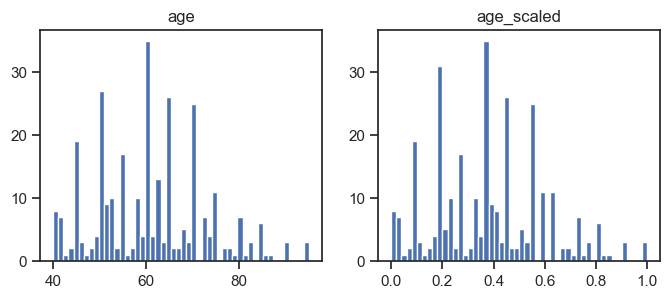

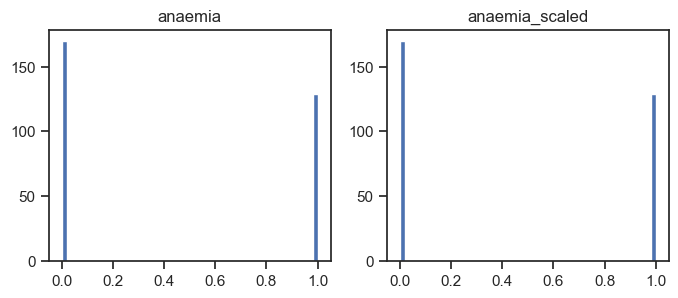

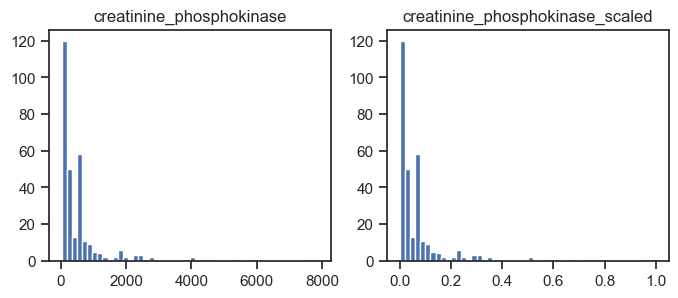

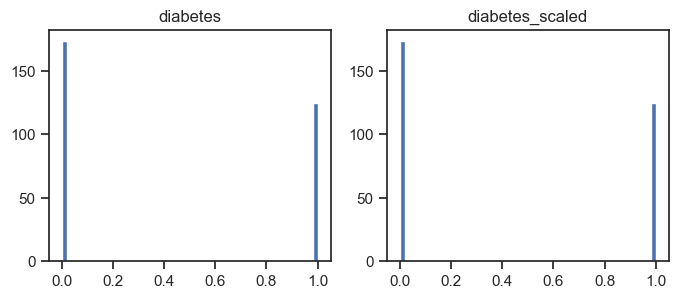

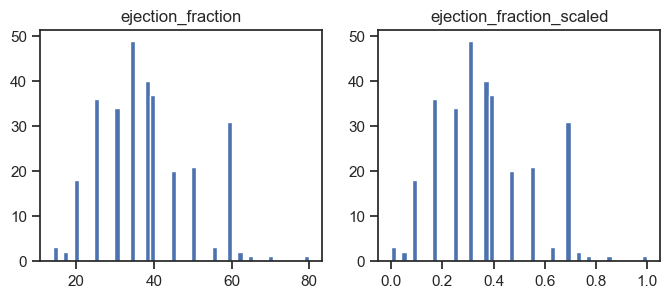

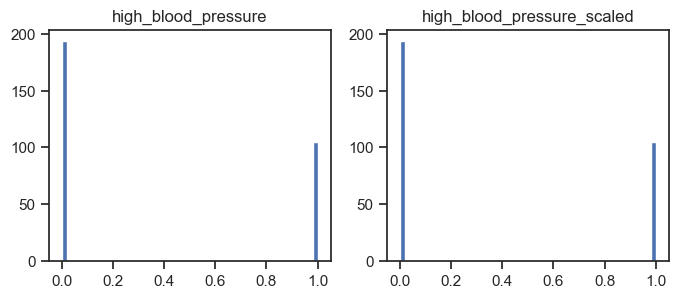

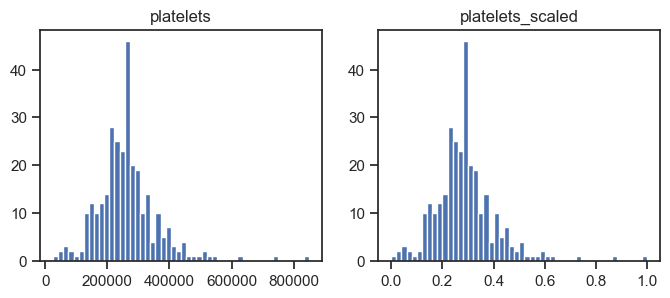

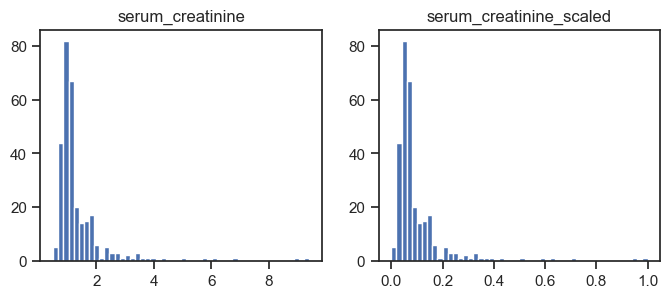

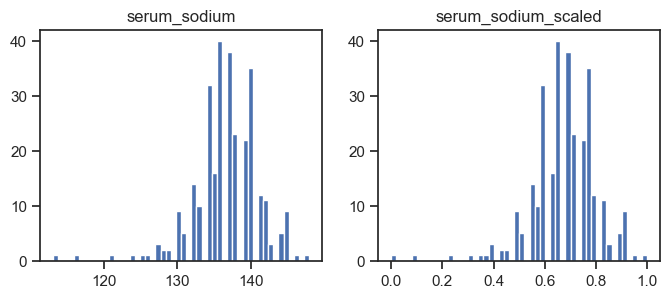

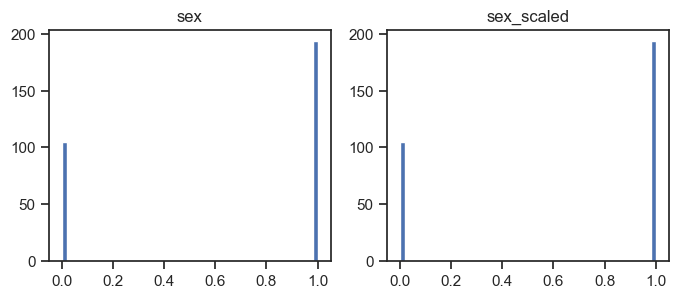

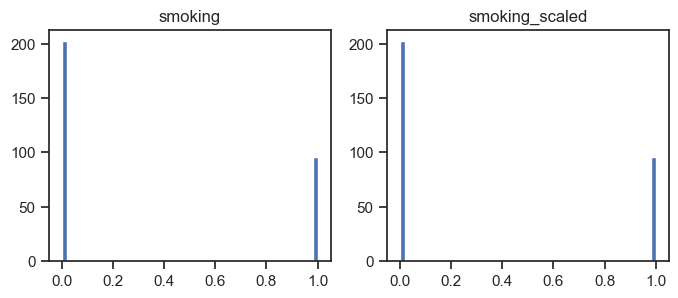

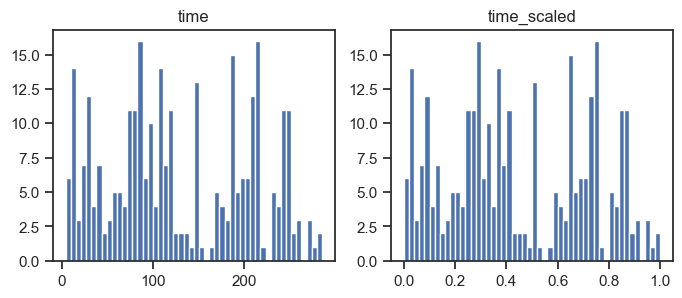

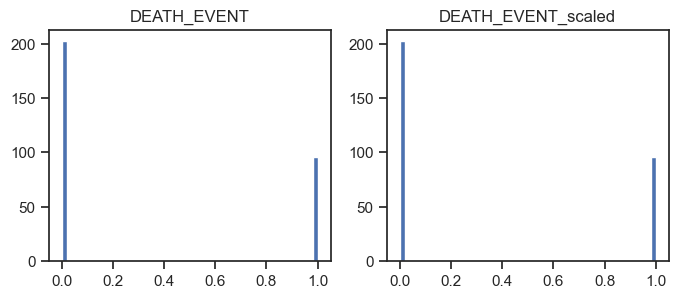

In [27]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

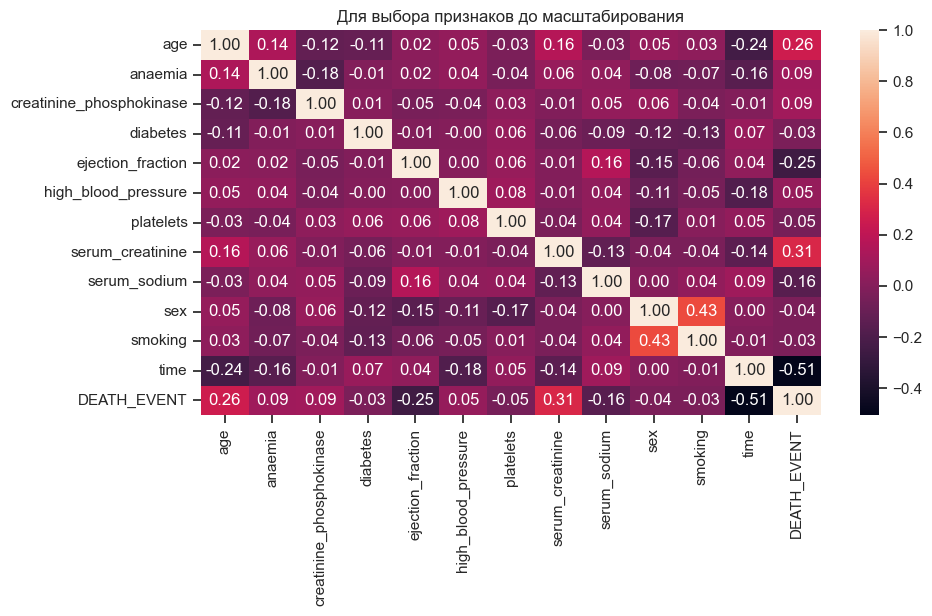

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train[scale_cols].corr(), annot=True, fmt='.2f')
ax.set_title('Для выбора признаков до масштабирования')
plt.show()

In [29]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['age_scaled',
 'anaemia_scaled',
 'creatinine_phosphokinase_scaled',
 'diabetes_scaled',
 'ejection_fraction_scaled',
 'high_blood_pressure_scaled',
 'platelets_scaled',
 'serum_creatinine_scaled',
 'serum_sodium_scaled',
 'sex_scaled',
 'smoking_scaled',
 'time_scaled',
 'DEATH_EVENT_scaled']

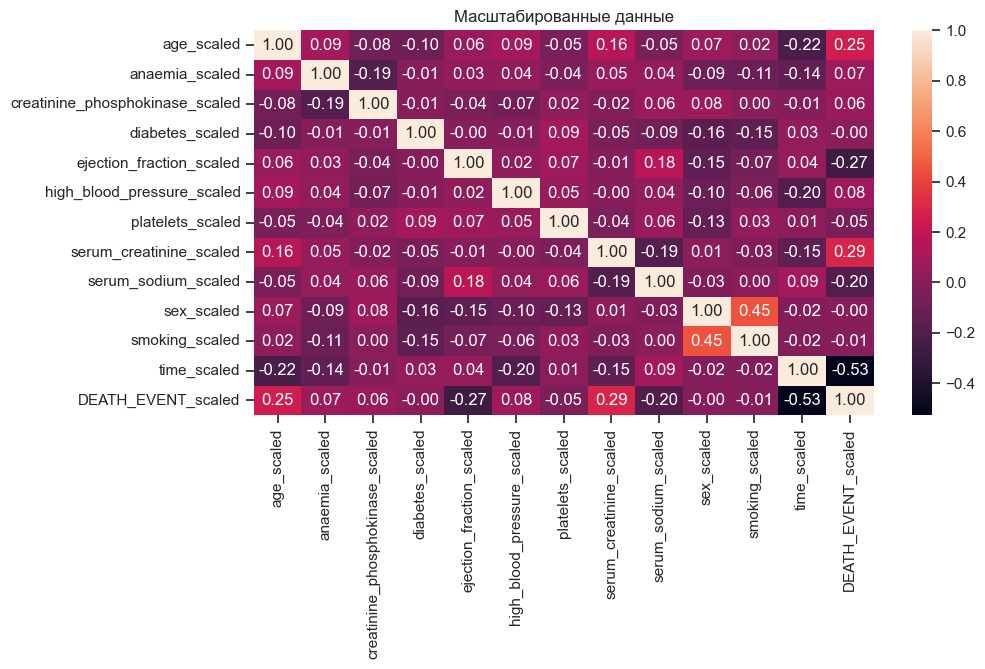

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

Для построения моделей будем использовать самые связные признаки. Категориальные признаки отсутствуют, их кодирования не требуется. Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Для деревьев выберем гиперпараметры:
- количество деревьев (n_estimators).
- oob_score (out-of-bag score) - это параметр, который указывает, следует ли использовать out-of-bag наблюдения для оценки точности модели. 
- Out-of-bag ошибки - которые не были использованы для обучения определенного дерева, но могут быть использованы для оценки точности. 
- random_state - это параметр, который указывает на начальное состояние генератора псевдослучайных чисел, используемых в модели. Если значение этого параметра зафиксировано, то модель будет генерировать одинаковые результаты каждый раз при запуске на одних и тех же данных.

# Выбор метрик для последующей оценки качества моделей.

- Accuracy - Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
- Оценка OBE (Out of bag error) - измеряет производительность модели на данных, которые не использовались в процессе обучения.
- Метрика recall (полнота) - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.
- Метрика F1 - Для того, чтобы объединить precision и recall в единую метрику используется Fβ мера, которая вычисляется как среднее гармоническое от precision и recall. Используем метод classification_report().

# Выбор наиболее подходящих моделей для решения задачи классификации.

- Стэкинг
- Градиентный бустинг
- Бэггинг
- Персептрон
- МГУА

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [31]:
# Признаки для задачи классификации
train1 = train
task_clas_cols = ['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']

In [32]:
# Выборки для задачи классификации
clas_X_train = train1[task_clas_cols]
clas_X_test = train1[task_clas_cols]
clas_Y_train = train1['DEATH_EVENT']
clas_Y_test = train1['DEATH_EVENT']
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((239, 5), (239, 5), (239,), (239,))

In [33]:
from sklearn.ensemble import BaggingClassifier
#сократим выборку для быстроты 
train1 = train
bc1 = BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)
bc1.fit(train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']], train1["DEATH_EVENT"])

BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)

In [34]:
# Объекты, использованные в обучающей выборке каждого дерева:
bc1.estimators_samples_

[array([165, 137, 177, 180, 103, 142, 138,  26, 202, 152, 238, 138, 191,
        179,  50, 172, 126,  67,  34, 221,  24,  43, 187, 149, 230, 228,
        236, 186,  58, 112, 118, 104,  46, 104, 203,  27,  74, 147,  37,
        228,  45, 187, 182, 132,  44, 142,  69, 156, 203, 225, 235,  74,
        234,  23, 167, 108, 188,  64, 171,   0,  50, 201, 150,  78, 171,
         42, 112,  77, 156,  50,   4, 114,  14,  56, 170, 196, 105, 204,
         43,  39, 196, 191,  43, 139, 212, 223, 237,  80, 176, 127, 159,
        116, 225,  56,  54, 199, 178, 210, 110, 138, 237, 220, 136, 205,
          4,  79, 236,  62,  44,  60, 218, 111,  74, 153, 114, 125, 195,
        137, 197, 102, 153,  88,  14, 130, 107, 110, 175, 118,  41, 219,
        151, 174,  62, 208,  66,  37,  14,  52, 120, 117, 224, 171, 209,
         68, 176, 171, 216, 213,  73, 190,  39, 188, 104,  92, 198, 150,
         44, 139, 165,  22, 167,  66, 163, 107, 171,  27, 224, 238, 153,
         85,  54,  40, 146, 222, 236, 234,  95,  38

In [35]:
# Построим бинарную матрицу, чтобы наглядно показать данные, попавшие в обучающую выборку. 1 = попадание в выборку
bin_array = np.zeros((3, train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']].shape[0]))
for i in range(3):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 

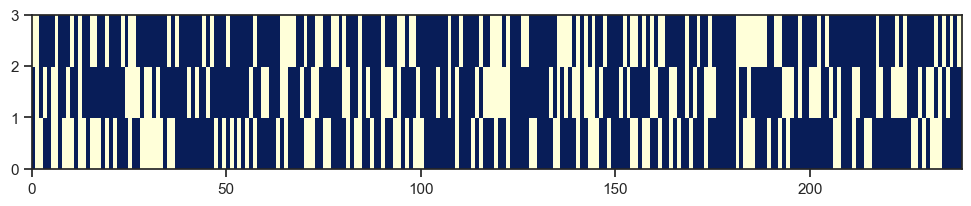

In [36]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [37]:
#OUT OF BAG ERROR
for i in range(3):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 36.82%
Для модели № 2 размер OOB составляет 36.82%
Для модели № 3 размер OOB составляет 33.47%


In [38]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.7698744769874477, 0.2301255230125523)

In [39]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [nan, nan],
       [1. , 0. ],
       [1. , 0. ],
       [nan, nan],
       [nan, nan],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [nan, nan],
       [1. , 0. ]])

[Text(0.4114583333333333, 0.95, 'x[0] <= 73.5\ngini = 0.475\nsamples = 151\nvalue = [146, 93]'),
 Text(0.16666666666666666, 0.85, 'x[3] <= 43.0\ngini = 0.272\nsamples = 43\nvalue = [12, 62]'),
 Text(0.1388888888888889, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.19444444444444445, 0.75, 'x[3] <= 73.5\ngini = 0.239\nsamples = 42\nvalue = [10, 62]'),
 Text(0.16666666666666666, 0.65, 'x[3] <= 71.0\ngini = 0.34\nsamples = 29\nvalue = [10, 36]'),
 Text(0.1388888888888889, 0.55, 'x[4] <= 1.15\ngini = 0.298\nsamples = 28\nvalue = [8, 36]'),
 Text(0.05555555555555555, 0.45, 'x[0] <= 66.0\ngini = 0.077\nsamples = 14\nvalue = [1, 24]'),
 Text(0.027777777777777776, 0.35, 'gini = 0.0\nsamples = 12\nvalue = [0, 22]'),
 Text(0.08333333333333333, 0.35, 'x[1] <= 27.5\ngini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222,

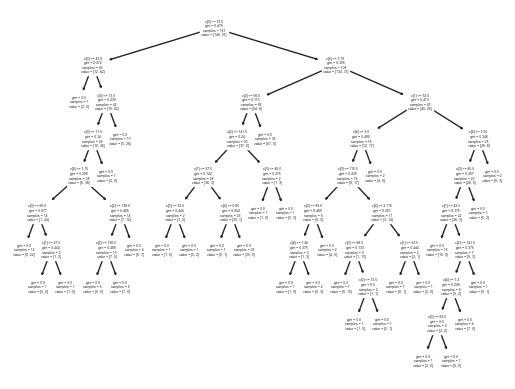

In [40]:
#Визуализация обученных деревьев
from sklearn import tree

tree.plot_tree(bc1.estimators_[0]) 

[Text(0.41796875, 0.9545454545454546, 'x[0] <= 73.5\ngini = 0.448\nsamples = 151\nvalue = [158, 81]'),
 Text(0.21875, 0.8636363636363636, 'x[3] <= 43.0\ngini = 0.26\nsamples = 44\nvalue = [10, 55]'),
 Text(0.1875, 0.7727272727272727, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(0.25, 0.7727272727272727, 'x[3] <= 73.5\ngini = 0.2\nsamples = 43\nvalue = [7, 55]'),
 Text(0.21875, 0.6818181818181818, 'x[2] <= 139.5\ngini = 0.295\nsamples = 31\nvalue = [7, 32]'),
 Text(0.1875, 0.5909090909090909, 'x[1] <= 47.5\ngini = 0.35\nsamples = 25\nvalue = [7, 24]'),
 Text(0.125, 0.5, 'x[2] <= 136.5\ngini = 0.293\nsamples = 22\nvalue = [5, 23]'),
 Text(0.09375, 0.4090909090909091, 'gini = 0.0\nsamples = 12\nvalue = [0, 15]'),
 Text(0.15625, 0.4090909090909091, 'x[4] <= 2.05\ngini = 0.473\nsamples = 10\nvalue = [5, 8]'),
 Text(0.125, 0.3181818181818182, 'x[0] <= 24.5\ngini = 0.397\nsamples = 9\nvalue = [3, 8]'),
 Text(0.0625, 0.22727272727272727, 'x[3] <= 47.0\ngini = 0.444\nsamples = 3\nvalue = [

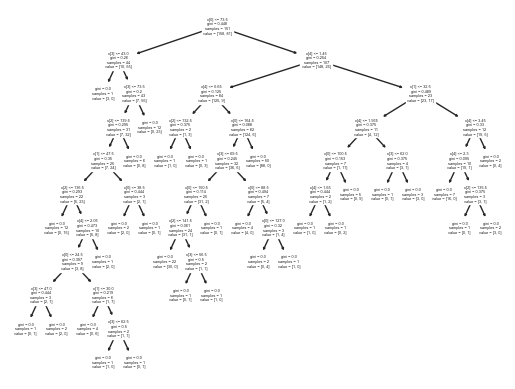

In [41]:
tree.plot_tree(bc1.estimators_[1]) 

[Text(0.41615853658536583, 0.9444444444444444, 'x[0] <= 67.5\ngini = 0.421\nsamples = 159\nvalue = [167, 72]'),
 Text(0.1402439024390244, 0.8333333333333334, 'x[1] <= 72.5\ngini = 0.316\nsamples = 40\nvalue = [12, 49]'),
 Text(0.11585365853658537, 0.7222222222222222, 'x[2] <= 136.5\ngini = 0.262\nsamples = 39\nvalue = [9, 49]'),
 Text(0.04878048780487805, 0.6111111111111112, 'x[4] <= 0.85\ngini = 0.067\nsamples = 20\nvalue = [1, 28]'),
 Text(0.024390243902439025, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07317073170731707, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 28]'),
 Text(0.18292682926829268, 0.6111111111111112, 'x[2] <= 137.5\ngini = 0.4\nsamples = 19\nvalue = [8, 21]'),
 Text(0.12195121951219512, 0.5, 'x[4] <= 1.2\ngini = 0.32\nsamples = 3\nvalue = [4, 1]'),
 Text(0.0975609756097561, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14634146341463414, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(0.24390243902439024,

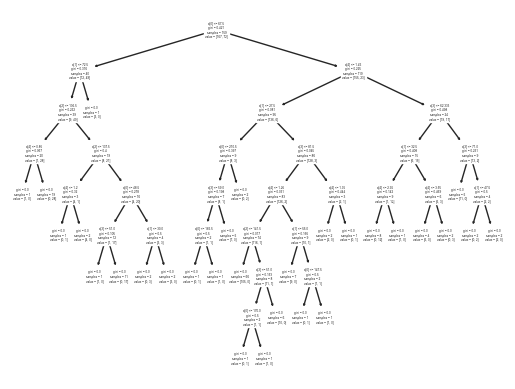

In [42]:
tree.plot_tree(bc1.estimators_[2]) 

In [43]:
#Визуализация результатов классификации
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(train1[['age', 'serum_creatinine']], train1[['DEATH_EVENT']])
    fig, ax = plt.subplots(figsize=(5,5))
    X0 = train1['age']
    X1 = train1['serum_creatinine']
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=train1['DEATH_EVENT'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('age')
    ax.set_ylabel('serum_creatinine')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
def plot_cl1(clf):
    title = clf.__repr__
    clf.fit(train1[['ejection_fraction', 'serum_sodium']], train1[['DEATH_EVENT']])
    fig, ax = plt.subplots(figsize=(5,5))
    X0 = train1['ejection_fraction']
    X1 = train1['serum_sodium']
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=train1['DEATH_EVENT'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('ejection_fraction')
    ax.set_ylabel('serum_sodium')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
def plot_cl2(clf):
    title = clf.__repr__
    clf.fit(train1[['time', 'age']], train1[['DEATH_EVENT']])
    fig, ax = plt.subplots(figsize=(5,5))
    X0 = train1['time']
    X1 = train1['age']
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=train1['DEATH_EVENT'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('time')
    ax.set_ylabel('age')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

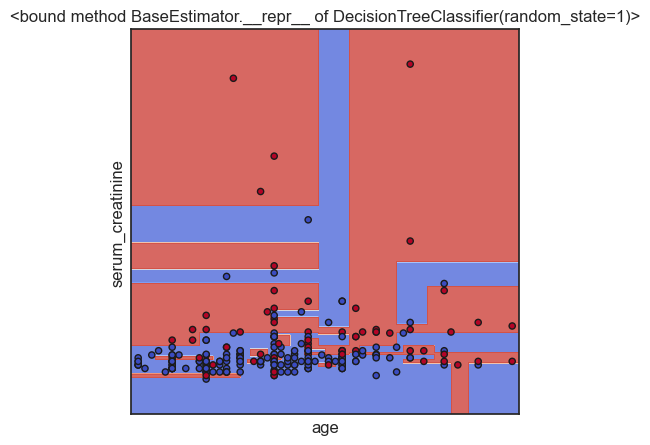

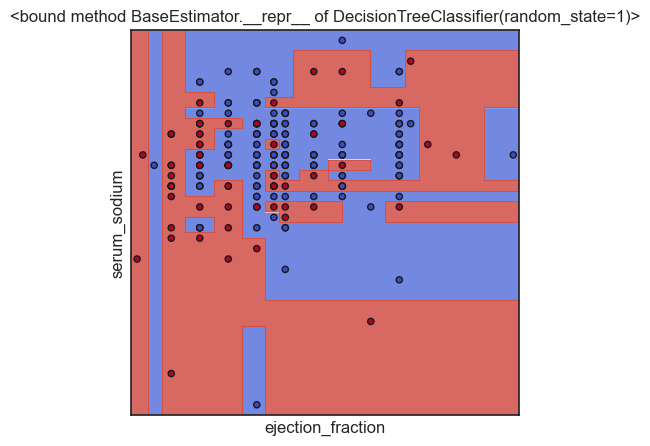

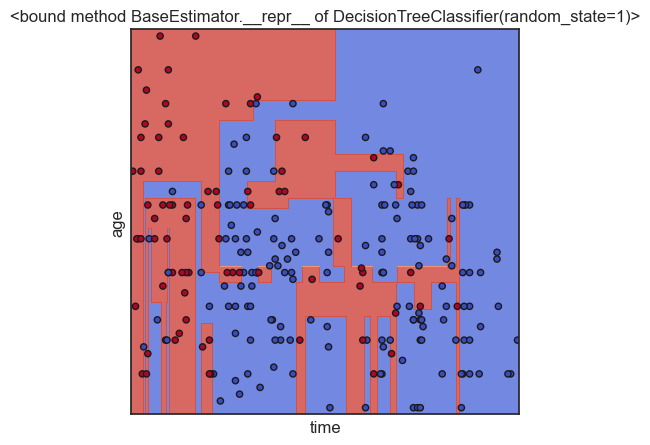

In [44]:
plot_cl(DecisionTreeClassifier(random_state=1))
plot_cl1(DecisionTreeClassifier(random_state=1))
plot_cl2(DecisionTreeClassifier(random_state=1))

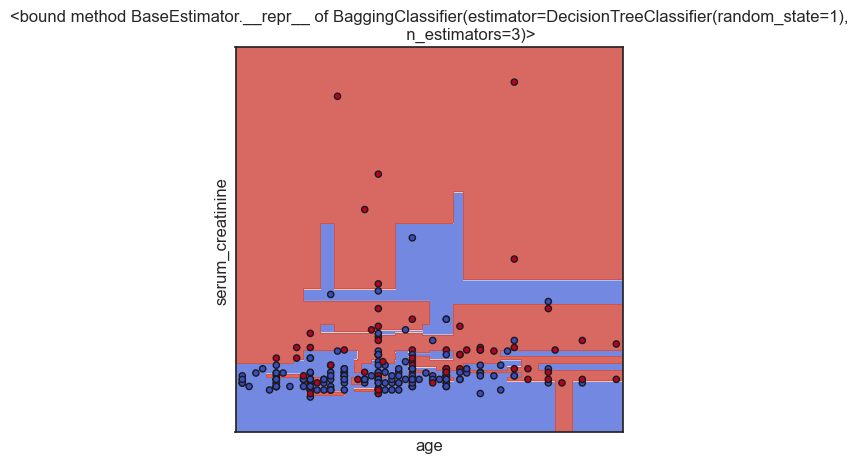

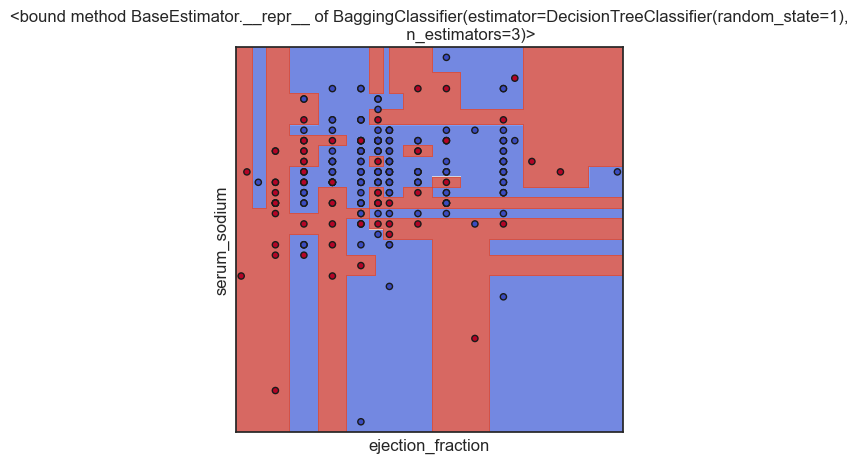

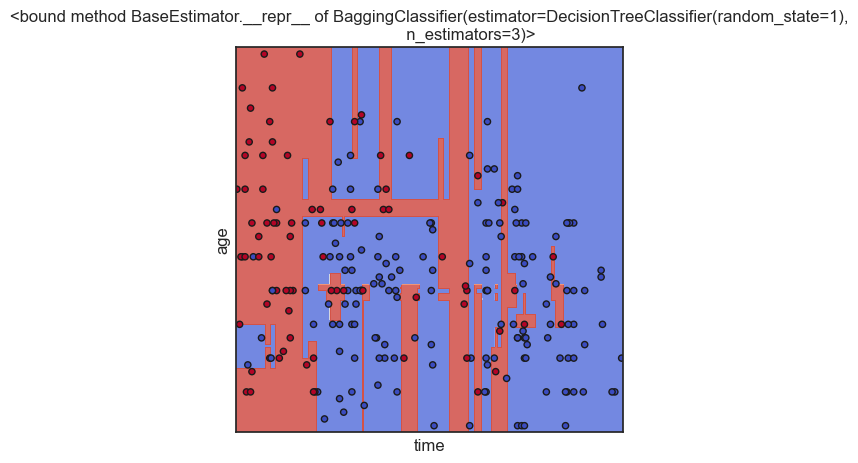

In [45]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=3))
plot_cl1(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=3))
plot_cl2(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=3))

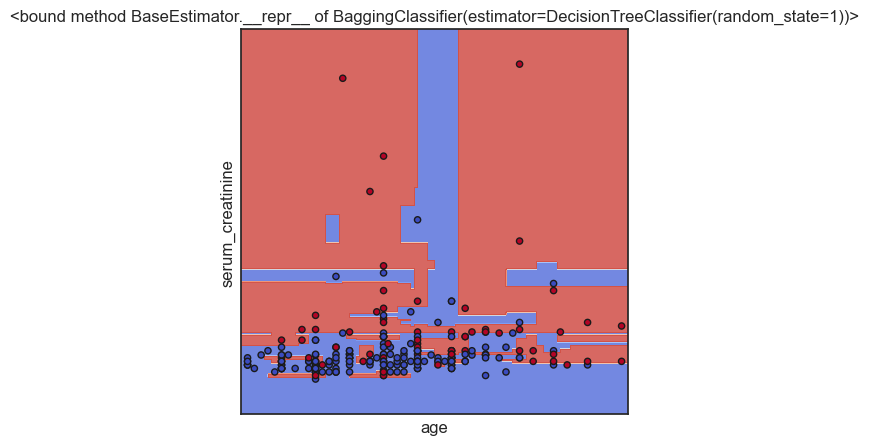

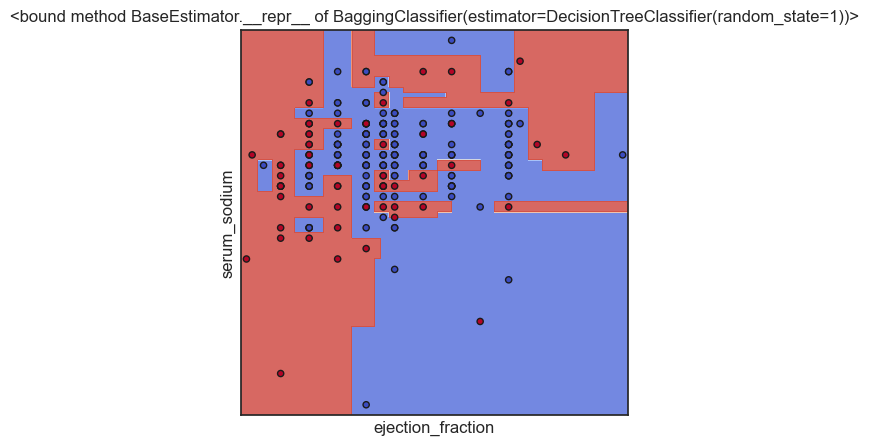

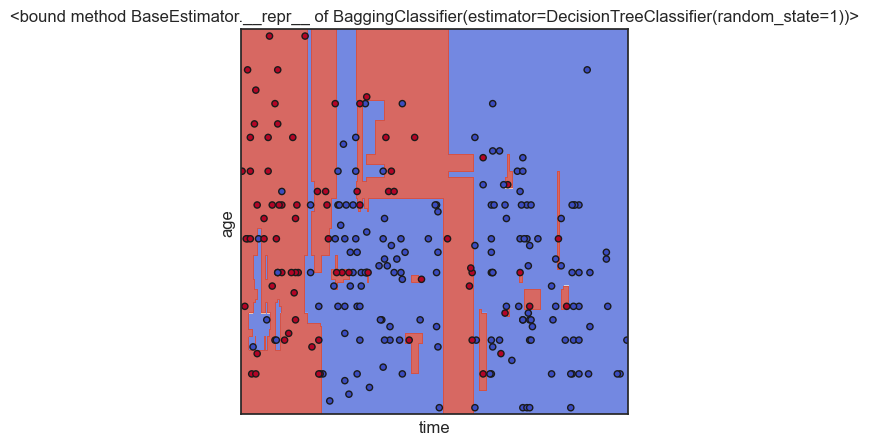

In [46]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=10))
plot_cl1(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=10))
plot_cl2(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=10))

# Бустинг

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
ab1 = AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=10)
ab1.fit(train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']], train1[['DEATH_EVENT']])

AdaBoostClassifier(algorithm='SAMME', n_estimators=3, random_state=10)

[Text(0.5, 0.75, 'x[0] <= 67.5\ngini = 0.443\nsamples = 239\nvalue = [0.669, 0.331]'),
 Text(0.25, 0.25, 'gini = 0.282\nsamples = 59\nvalue = [0.042, 0.205]'),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 180\nvalue = [0.628, 0.126]')]

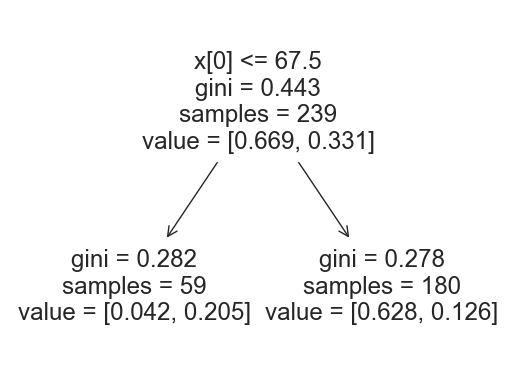

In [48]:
tree.plot_tree(ab1.estimators_[0]) 

[Text(0.5, 0.75, 'x[4] <= 1.45\ngini = 0.5\nsamples = 239\nvalue = [0.502, 0.498]'),
 Text(0.25, 0.25, 'gini = 0.45\nsamples = 180\nvalue = [0.429, 0.223]'),
 Text(0.75, 0.25, 'gini = 0.331\nsamples = 59\nvalue = [0.073, 0.275]')]

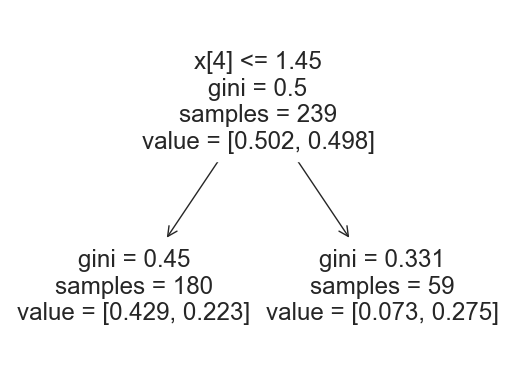

In [49]:
tree.plot_tree(ab1.estimators_[1]) 

[Text(0.5, 0.75, 'x[1] <= 27.5\ngini = 0.49\nsamples = 239\nvalue = [0.428, 0.572]'),
 Text(0.25, 0.25, 'gini = 0.29\nsamples = 46\nvalue = [0.05, 0.237]'),
 Text(0.75, 0.25, 'gini = 0.498\nsamples = 193\nvalue = [0.377, 0.336]')]

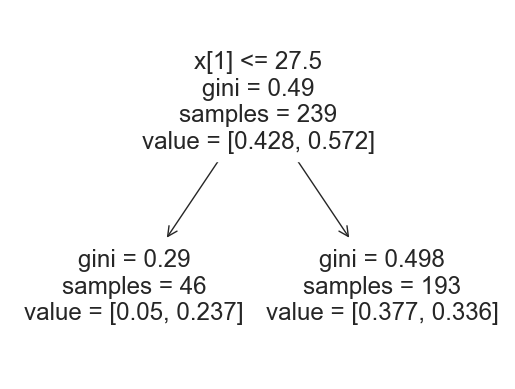

In [50]:
tree.plot_tree(ab1.estimators_[2]) 

# Визуализация классификации

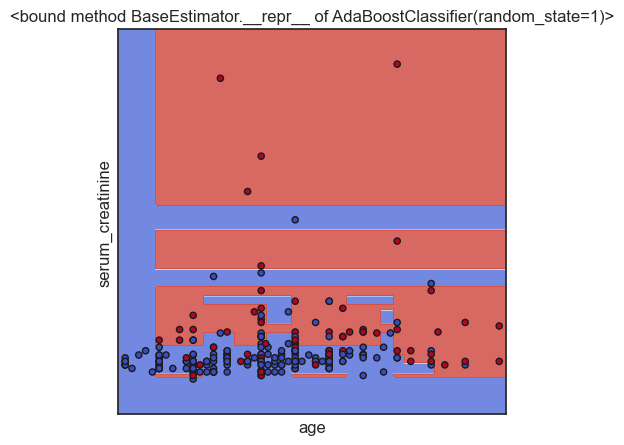

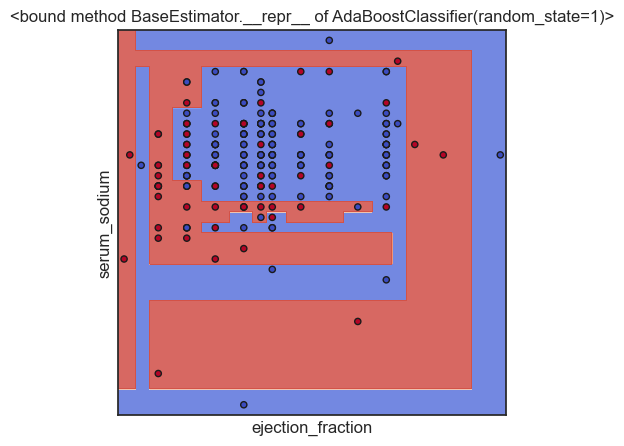

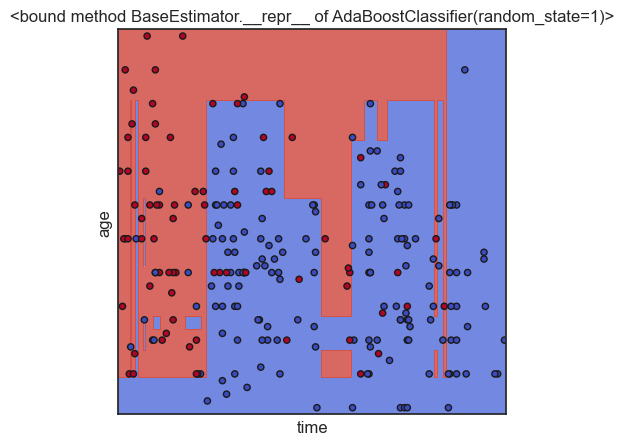

In [51]:
plot_cl(AdaBoostClassifier(random_state=1))
plot_cl1(AdaBoostClassifier(random_state=1))
plot_cl2(AdaBoostClassifier(random_state=1))

In [52]:
#Визуализация важности признаков
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

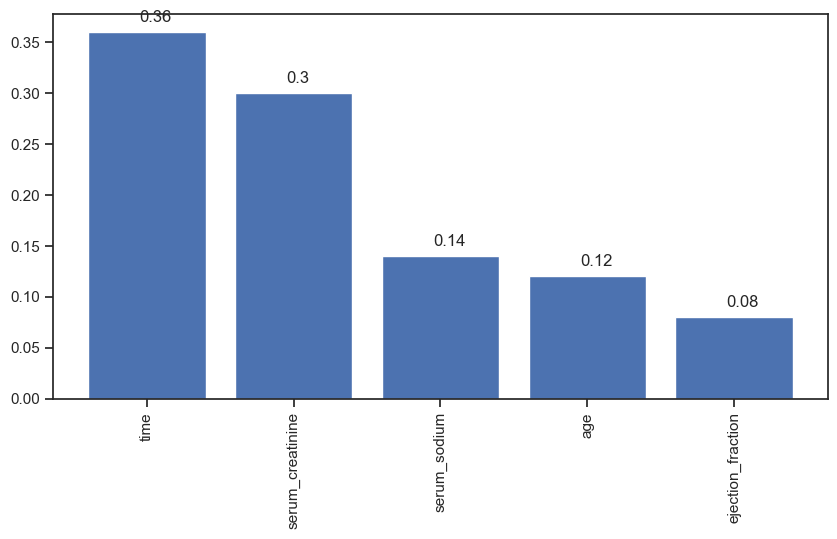

In [53]:
dataset_x_ds = pd.DataFrame(data=train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']], columns=['time', 'ejection_fraction','serum_sodium','age','serum_creatinine'])
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(dataset_x_ds, train1["DEATH_EVENT"])
_,_ = draw_feature_importances(ab2, dataset_x_ds)

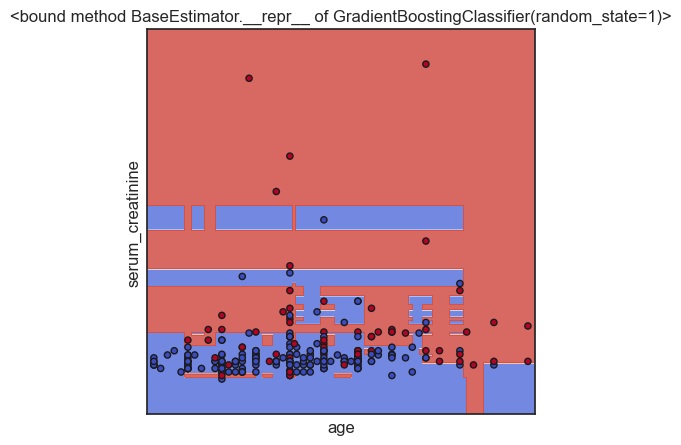

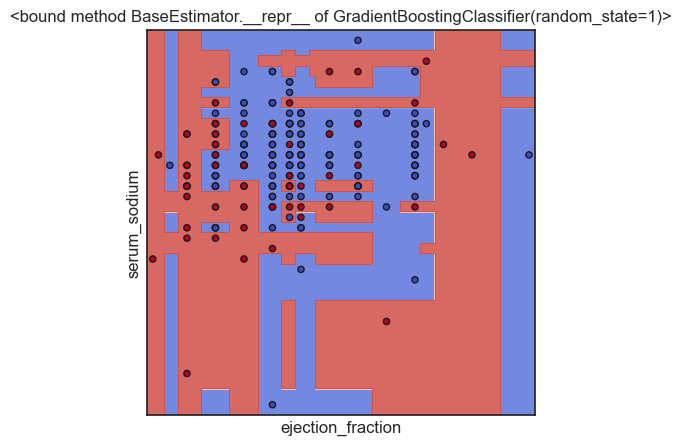

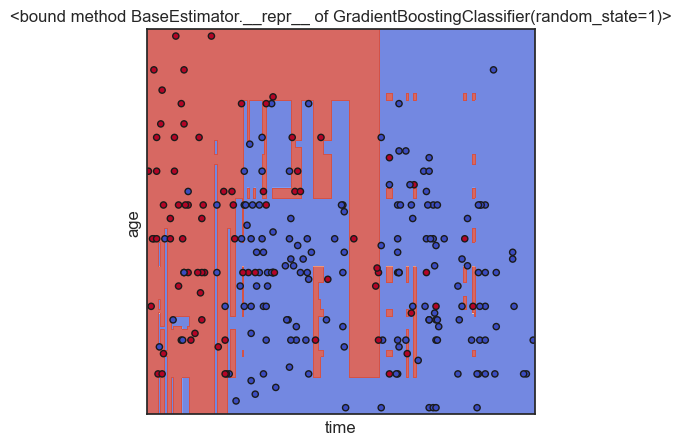

In [54]:
#GradientBoostingClassifier (актуальный алгоритм для бустинга)
plot_cl(GradientBoostingClassifier(random_state=1))
plot_cl1(GradientBoostingClassifier(random_state=1))
plot_cl2(GradientBoostingClassifier(random_state=1))

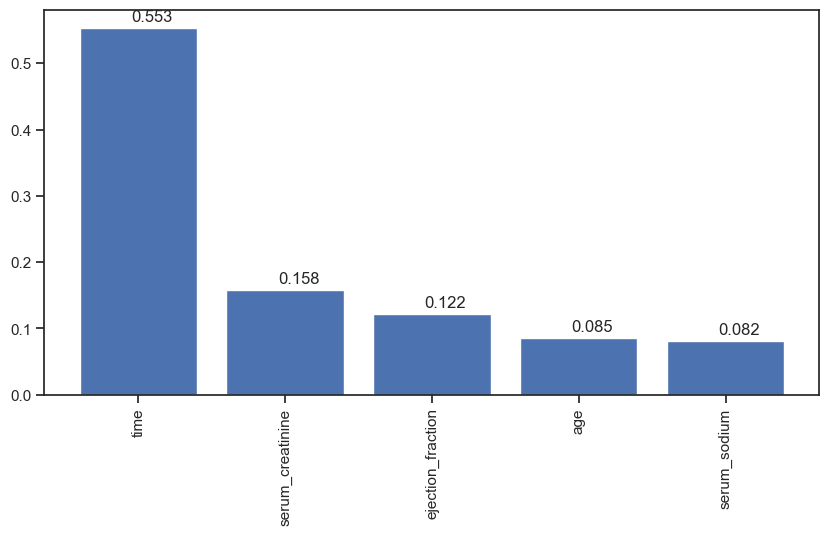

In [55]:
#Важность признаков
dataset_gb_cl = GradientBoostingClassifier(random_state=1)
dataset_gb_cl.fit(dataset_x_ds, train1["DEATH_EVENT"])
_,_ = draw_feature_importances(dataset_gb_cl, dataset_x_ds)

In [56]:
#Стекинг
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
              LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']], train1['DEATH_EVENT'])

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [57]:
# Средняя точность:
clf.fit(train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']], train1['DEATH_EVENT']).score(test[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']], test['DEATH_EVENT'])

0.9

In [58]:
clf.decision_function(test[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']])[55:65]

array([ 2.30980364, -2.33402097,  0.10413579, -1.26943489, -2.8942492 ])

In [59]:
# Оценим качества моделей метриками:
# Для стекинга 

# создаем прогнозы на тестовом наборе данных
y_pred = clf.predict(test[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']])

# оцениваем качество модели на основе метрик accuracy, precision, recall и f1-score
print(classification_report(test['DEATH_EVENT'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60



In [60]:
# Для бустинга 

# создаем прогнозы на тестовом наборе данных
y_pred = ab1.predict(test[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']])

# оцениваем качество модели на основе метрик accuracy, precision, recall и f1-score
print(classification_report(test['DEATH_EVENT'], y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.65      0.79        17

    accuracy                           0.90        60
   macro avg       0.94      0.82      0.86        60
weighted avg       0.91      0.90      0.89        60



In [61]:
# Для бэггинга  

# создаем прогнозы на тестовом наборе данных
y_pred = bc1.predict(test[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']])

# оцениваем качество модели на основе метрик accuracy, precision, recall и f1-score
print(classification_report(test['DEATH_EVENT'], y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.80      0.71      0.75        17

    accuracy                           0.87        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.86      0.87      0.86        60



In [62]:
# Многослойный персептрон 
from sklearn.neural_network import MLPClassifier

# разделение на признаки и целевую переменную
X = train[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']]
y = train["DEATH_EVENT"]

# масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# разбиение на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# создание модели многослойного персептрона
clf1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# обучение модели на тренировочном наборе данных
clf1.fit(X_train, y_train)

# оценка качества модели на тестовом наборе данных
score = clf1.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8541666666666666


In [63]:
# МГУА
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# разделение на признаки и целевую переменную
X = train1[['time', 'ejection_fraction','serum_sodium','age','serum_creatinine']]
y = train1["DEATH_EVENT"]

# разбиение на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создание базовых моделей
rf = RandomForestClassifier(n_estimators=10, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# создание модели МГУА
estimators = [('rf', rf), ('mlp', mlp)]
clf2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# обучение модели на тренировочном наборе данных
clf2.fit(X_train, y_train)

# оценка качества модели на тестовом наборе данных
score = clf2.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8333333333333334


### Вывод: стэкинг и бустинг - самые точные модели.

In [64]:
X_train = X_train.values
y_train = y_train.values

In [65]:
laptop_combi_model = gmdh.Combi()
laptop_combi_model.fit(X_train, y_train, verbose=1, n_jobs=-1, test_size=0.2, limit=0, 
                       criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY))
print()
print(laptop_combi_model.get_best_polynomial())
print()
laptop_y_pred_combi = laptop_combi_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_combi)

LEVEL 1  [=========================] 100% :00s] (5 combinations) error=8.462468                                     
LEVEL 2  [=========================] 100% :00s] (10 combinations) error=7.556413                                    
LEVEL 3  [=========================] 100% :00s] (10 combinations) error=6.655629                                    
LEVEL 4  [=========================] 100% :00s] (5 combinations) error=6.678477                                     

y = - 0.0025*x1 - 0.0079*x2 + 0.1078*x5 + 0.7808

R^2: 0.34584504933789884
RMSE: 0.3868159615465387
MAE: 0.3014861697669593


In [66]:
laptop_multi_model = gmdh.Multi()
laptop_multi_model.fit(X_train, y_train, verbose=1, n_jobs=-1, test_size=0.2, limit=0, k_best=5, 
                       criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY))
print()
print(laptop_multi_model.get_best_polynomial())
print()
laptop_y_pred_multi = laptop_multi_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_multi)

LEVEL 1  [=========================] 100% :00s] (5 combinations) error=8.462468                                     
LEVEL 2  [=========================] 100% :00s] (10 combinations) error=7.556413                                    
LEVEL 3  [=========================] 100% :00s] (8 combinations) error=6.655629                                     
LEVEL 4  [=========================] 100% :00s] (4 combinations) error=6.678477                                     

y = - 0.0025*x1 - 0.0079*x2 + 0.1078*x5 + 0.7808

R^2: 0.34584504933789884
RMSE: 0.3868159615465387
MAE: 0.3014861697669593


In [67]:
laptop_mia_model = gmdh.Mia()
laptop_mia_model.fit(X_train, y_train, verbose=1, n_jobs=-1, test_size=0.2, limit=0, k_best=9, 
                     criterion=gmdh.Criterion(gmdh.CriterionType.SYM_REGULARITY), 
                     polynomial_type=gmdh.PolynomialType.LINEAR)
laptop_y_pred_mia = laptop_mia_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_mia)

LEVEL 1  [=========================] 100% :00s] (10 combinations) error=31.690971                                   
LEVEL 2  [=========================] 100% :00s] (36 combinations) error=29.398827                                   
LEVEL 3  [=========================] 100% :00s] (36 combinations) error=29.309356                                   
LEVEL 4  [=========================] 100% :00s] (36 combinations) error=29.319717                                   
R^2: 0.37761126710715476
RMSE: 0.3773070596865268
MAE: 0.28711588606308597


In [68]:
laptop_ria_model = gmdh.Ria()
laptop_ria_model.fit(X_train, y_train, verbose=1, n_jobs=-1, test_size=0.2, limit=0, k_best=7, 
                     criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY),
                     polynomial_type=gmdh.PolynomialType.LINEAR)
laptop_y_pred_ria = laptop_ria_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_ria)

LEVEL 1  [=========================] 100% :00s] (10 combinations) error=7.556413                                    
LEVEL 2  [=========================] 100% :00s] (35 combinations) error=6.658369                                    
LEVEL 3  [=========================] 100% :00s] (35 combinations) error=6.653646                                    
LEVEL 4  [=========================] 100% :00s] (35 combinations) error=6.653646                                    
R^2: 0.345864446426302
RMSE: 0.3868102265452092
MAE: 0.30142227375154157


In [69]:
laptop_linear_model = LinearRegression()
laptop_linear_model.fit(X_train, y_train)
laptop_y_pred_linear = laptop_linear_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_linear)

R^2: 0.393751201764416
RMSE: 0.3723827163599872
MAE: 0.28355824315803696


In [70]:
laptop_forest_model = RandomForestRegressor(random_state=42)
laptop_forest_model.fit(X_train, y_train)
laptop_y_pred_forest = laptop_forest_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_forest)

R^2: 0.4264318785578748
RMSE: 0.3622067779597725
MAE: 0.19770833333333335


In [71]:
laptop_boosting_model = GradientBoostingRegressor(random_state=42)
laptop_boosting_model.fit(X_train, y_train)
laptop_y_pred_boosting = laptop_boosting_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_boosting)

R^2: 0.3956117769294504
RMSE: 0.3718108567219269
MAE: 0.2219750792591033


In [72]:
laptop_neighbors_model = KNeighborsRegressor()
laptop_neighbors_model.fit(X_train, y_train)
laptop_y_pred_neighbors = laptop_neighbors_model.predict(X_test)
print_metrics(y_test, laptop_y_pred_neighbors)

R^2: 0.43165085388994295
RMSE: 0.36055512754639896
MAE: 0.23333333333333336


In [73]:
print('combi')
print_metrics(y_test, laptop_y_pred_combi)
print('\nmulti')
print_metrics(y_test, laptop_y_pred_multi)
print('\nmia')
print_metrics(y_test, laptop_y_pred_mia)
print('\nria')
print_metrics(y_test, laptop_y_pred_ria)
print('\nlinear')
print_metrics(y_test, laptop_y_pred_linear)
print('\nforest')
print_metrics(y_test, laptop_y_pred_forest)
print('\nboosting')
print_metrics(y_test, laptop_y_pred_boosting)
print('\nneighbors')
print_metrics(y_test, laptop_y_pred_neighbors)

combi
R^2: 0.34584504933789884
RMSE: 0.3868159615465387
MAE: 0.3014861697669593

multi
R^2: 0.34584504933789884
RMSE: 0.3868159615465387
MAE: 0.3014861697669593

mia
R^2: 0.37761126710715476
RMSE: 0.3773070596865268
MAE: 0.28711588606308597

ria
R^2: 0.345864446426302
RMSE: 0.3868102265452092
MAE: 0.30142227375154157

linear
R^2: 0.393751201764416
RMSE: 0.3723827163599872
MAE: 0.28355824315803696

forest
R^2: 0.4264318785578748
RMSE: 0.3622067779597725
MAE: 0.19770833333333335

boosting
R^2: 0.3956117769294504
RMSE: 0.3718108567219269
MAE: 0.2219750792591033

neighbors
R^2: 0.43165085388994295
RMSE: 0.36055512754639896
MAE: 0.23333333333333336


### Вывод: модели случайный лес и бустинг оказались более точными.